In [1]:
# Simple Linear Regression
# Importing the libraries

# Package for Reading and wrangling data
import pandas as pd
import numpy as np

#Package for Visualization
import matplotlib.pyplot as plt

#ML packages from scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv("Salary_Data.csv")

In [11]:
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

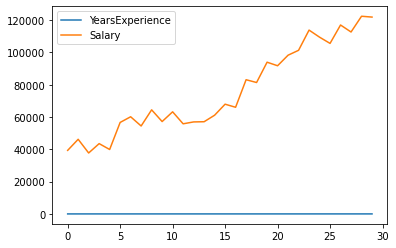

In [14]:
df.plot()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

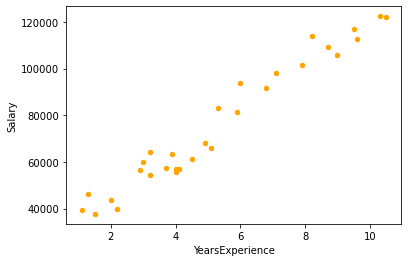

In [15]:
df.plot.scatter(x ='YearsExperience',y = 'Salary',c = 'orange')

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

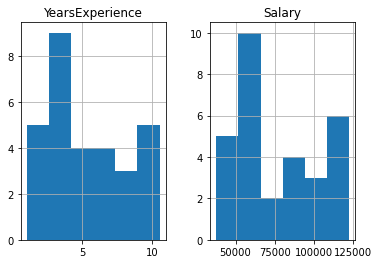

In [16]:
df.hist(bins=6)

In [27]:
X = df.iloc[:,:-1].values

In [32]:
y=df.iloc[:,1].values

In [33]:
print(X.shape)

(30, 1)


In [35]:
print(y.shape)

(30,)


In [36]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [37]:
# Splitting the dataframe into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(type(X_train))

<class 'numpy.ndarray'>


# Modeling

In [40]:
X_train, X_test.shape, y_test.shape

(array([[ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 (10, 1),
 (10,))

In [41]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print(type(regressor))

<class 'sklearn.linear_model._base.LinearRegression'>


In [42]:
# Save Model Using Pickle
import pickle
filename = 'salary.pkl'
pickle.dump(regressor, open(filename, 'wb'))

#Load model
regressor = pickle.load(open(filename, 'rb'))

In [43]:
# Predicting the Test set results
y_pred = regressor.predict(X_test) ## minimizer Error function(In this case it is sum of least square)
print(type(y_pred))
y_pred

<class 'numpy.ndarray'>


array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

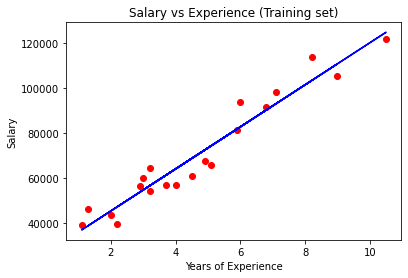

In [44]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

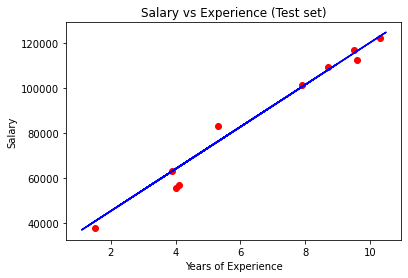

In [45]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [46]:
#Prediction Accuracy
#MAPE ( Mean absolute percentage error)
y_true, y_pred = np.array(y_test), np.array(y_pred)
np.mean(np.abs((y_true - y_pred) / y_true))*100

5.261897682192567

In [47]:
#Prediction Accuracy
#Correlation Coefficient R
np.corrcoef(y_test,y_pred)[0, 1]

0.9897646900878637

In [49]:
regressor.intercept_

26816.19224403119

In [51]:
regressor.coef_

array([9345.94244312])

In [53]:

#Create an array
a = np.array([[0,],[1,],[2,],[100,]])
#predict
regressor.predict(a)

array([ 26816.19224403,  36162.13468715,  45508.07713028, 961410.43655627])

In [ ]:
#model ( Accuracy Vs Explainability)
y = mx + c
y = W0 + W1*X (Bias Vs Variance)
y = 26816.192244031183 + 9345.94244312 * x + W2 *X^2(W2=0)